In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import sys
import json
import pickle
from yaml import safe_load
from tqdm import tqdm
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

# Data Extraction

In [2]:
filename = []
for i in os.listdir("t20s"):
    filename.append(os.path.join("t20s",i))

In [3]:
filename[:10]

['t20s\\1001349.yaml',
 't20s\\1001351.yaml',
 't20s\\1001353.yaml',
 't20s\\1004729.yaml',
 't20s\\1007655.yaml',
 't20s\\1007657.yaml',
 't20s\\1007659.yaml',
 't20s\\1019979.yaml',
 't20s\\1019981.yaml',
 't20s\\1019983.yaml']

In [6]:
# convert in to data frame and use counter to create match id
try:
    final_df = pd.DataFrame()
    counter = 1
    for i in tqdm(filename):
        with open(i,"r") as f:
            df = pd.json_normalize(safe_load(f))
            df["match_id"] = counter
            final_df = final_df.append(df)
            counter+=1
    final_df
except Exception as e:
    print(e)


  0%|                                                                                 | 1/1433 [00:01<26:59,  1.13s/it]

'NoneType' object has no attribute 'append'


In [23]:
try:
    final_dfs = []  # List to hold individual DataFrames
    counter = 1
    for i in tqdm(filename):
        with open(i, "r") as f:
            yaml_content = f.read()
            if yaml_content:
                data = safe_load(yaml_content)  # Load YAML data using safe_load
                df = pd.json_normalize(data)  # Normalize YAML data
                df["match_id"] = counter
                final_dfs.append(df)
                counter += 1

    if final_dfs:
        final_df = pd.concat(final_dfs, ignore_index=True)  # Concatenate all DataFrames into a single DataFrame
        # Display the first few rows of the final DataFrame
        print(final_df.head())
    else:
        print("No valid YAML data found in the provided files.")
except Exception as e:
    print(e)


100%|█████████████████████████████████████████████████████████████████████████████▉| 1432/1433 [10:45<00:00,  2.22it/s]

In [28]:
final_dfs

[                                             innings  meta.data_version  \
 0  [{'1st innings': {'team': 'Australia', 'delive...                0.9   
 
   meta.created  meta.revision    info.dates info.gender info.match_type  \
 0   2017-02-18              2  [2017-02-17]        male             T20   
 
    info.outcome.by.wickets info.outcome.winner  info.overs  \
 0                        5           Sri Lanka          20   
 
   info.player_of_match              info.teams info.toss.decision  \
 0      [DAS Gunaratne]  [Australia, Sri Lanka]              field   
 
   info.toss.winner            info.umpires                info.venue  match_id  
 0        Sri Lanka  [MD Martell, P Wilson]  Melbourne Cricket Ground         1  ,
                                              innings  meta.data_version  \
 0  [{'1st innings': {'team': 'Australia', 'delive...                0.9   
 
   meta.created  meta.revision info.city    info.dates info.gender  \
 0   2017-02-19              2  V

In [30]:
final_df = pd.concat(final_dfs, ignore_index=True)

In [32]:
bacakup = final_df.copy()

In [34]:
final_df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,[2017-02-17],male,T20,5.0,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,[2017-02-19],male,T20,2.0,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,[2017-02-22],male,T20,NaN,Australia,20,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,[2016-09-05],male,T20,NaN,Hong Kong,20,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,[2016-06-18],male,T20,NaN,Zimbabwe,20,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
final_df.tail()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
1427,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-03-05,2,[2016-03-04],male,T20,6.0,Pakistan,20,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1428,Mirpur,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2016-03-08,1,[2016-03-06],male,T20,8.0,India,20,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1429,Mirpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,"[{'1st innings': {'team': 'Netherlands', 'deli...",0.9,2016-02-03,1,[2016-02-03],male,T20,NaN,Netherlands,20,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1430,Dubai,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2016-09-12,1,[2016-09-06],male,T20,NaN,Australia,20,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1431,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2016-09-12,1,[2016-09-09],male,T20,4.0,Australia,20,[GJ Maxwell],"[Sri Lanka, Australia]",bat,Sri Lanka,"[REJ Martinesz, RSA Palliyaguruge]",R Premadasa Stadium,1432,Colombo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
pickle.dump(final_df,open('final_df.pkl',"wb"))

In [40]:
# drop that columns that is no use for model buelding
final_df.drop(columns=[
    'meta.data_version',
    'meta.created',
    'meta.revision',
    'info.outcome.bowl_out',
    'info.bowl_out',
    'info.supersubs.South Africa',
    'info.supersubs.New Zealand',
    'info.outcome.eliminator',
    'info.outcome.result',
    'info.outcome.method',
    'info.neutral_venue',
    'info.match_type_number',
    'info.outcome.by.runs',
    'info.outcome.by.wickets'
],inplace=True)

In [41]:
final_df

,innings,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.city
0,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-17],male,T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Melbourne Cricket Ground,1,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-19],male,T20,Sri Lanka,20,[DAS Gunaratne],"[Australia, Sri Lanka]",field,Sri Lanka,"[SD Fry, SJ Nogajski]","Simonds Stadium, South Geelong",2,Victoria
2,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-02-22],male,T20,Australia,20,[A Zampa],"[Australia, Sri Lanka]",field,Sri Lanka,"[MD Martell, P Wilson]",Adelaide Oval,3,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",[2016-09-05],male,T20,Hong Kong,20,NaN,"[Ireland, Hong Kong]",bat,Hong Kong,"[R Black, AJ Neill]","Bready Cricket Club, Magheramason",4,Londonderry
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",[2016-06-18],male,T20,Zimbabwe,20,[E Chigumbura],"[Zimbabwe, India]",field,India,"[TJ Matibiri, RB Tiffin]",Harare Sports Club,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-03-04],male,T20,Pakistan,20,[Umar Akmal],"[Pakistan, Sri Lanka]",field,Pakistan,"[AK Chaudhary, Enamul Haque]",Shere Bangla National Stadium,1428,Mirpur
1428,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2016-03-06],male,T20,India,20,[S Dhawan],"[Bangladesh, India]",field,India,"[RSA Palliyaguruge, Shozab Raza]",Shere Bangla National Stadium,1429,Mirpur
1429,"[{'1st innings': {'team': 'Netherlands', 'deli...",[2016-02-03],male,T20,Netherlands,20,[Mudassar Bukhari],"[United Arab Emirates, Netherlands]",field,United Arab Emirates,"[CK Nandan, Sarika Prasad]",ICC Academy,1430,Dubai
1430,"[{'1st innings': {'team': 'Australia', 'delive...",[2016-09-06],male,T20,Australia,20,[GJ Maxwell],"[Sri Lanka, Australia]",field,Sri Lanka,"[REJ Martinesz, RR Wimalasiri]",Pallekele International Cricket Stadium,1431,NaN


In [53]:
## We need Male T20 matches to build over model so if ther is any female match we will remove that
final_df = final_df[final_df['info.gender'] == 'male']
final_df.drop('info.gender',axis=1,inplace=True)

In [61]:
final_df["info.match_type"].value_counts()

info.match_type
T20    966
Name: count, dtype: int64

In [64]:
## Remove the 50 over match from this data we dont need them
final_df["info.overs"].value_counts()
final_df = final_df[final_df["info.overs"] == 20]

In [79]:
# extracting ball by ball data and store in to data frame
count = 1
delivery_dfs = []  # List to hold individual DataFrames for each iteration

for index, row in final_df.iterrows():
    if count in [75, 108, 150, 180, 268, 360, 443, 458, 584, 748, 982, 1052, 1111, 1226, 1345]:
        count += 1
        continue
    count += 1
    ball_of_match = []
    batsman = []
    bowler = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    city = []
    venue = []

    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            batsman.append(ball[key]['batsman'])
            bowler.append(ball[key]['bowler'])
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')

    loop_df = pd.DataFrame({
        'match_id': match_id,
        'teams': teams,
        'batting_team': batting_team,
        'ball': ball_of_match,
        'batsman': batsman,
        'bowler': bowler,
        'runs': runs,
        'player_dismissed': player_of_dismissed,
        'city': city,
        'venue': venue
    })

    delivery_dfs.append(loop_df)  # Append individual DataFrames to the list

delivery_df = pd.concat(delivery_dfs, ignore_index=True)  # Concatenate all DataFrames into a single DataFrame

        match_id                   teams batting_team  ball          batsman  \
0              2  [Australia, Sri Lanka]    Australia   0.1         AJ Finch   
1              2  [Australia, Sri Lanka]    Australia   0.2         AJ Finch   
2              2  [Australia, Sri Lanka]    Australia   0.3         AJ Finch   
3              2  [Australia, Sri Lanka]    Australia   0.4        M Klinger   
4              2  [Australia, Sri Lanka]    Australia   0.5        M Klinger   
...          ...                     ...          ...   ...              ...   
115320       964  [Sri Lanka, Australia]    Sri Lanka  19.3  SMSM Senanayake   
115321       964  [Sri Lanka, Australia]    Sri Lanka  19.4      DM de Silva   
115322       964  [Sri Lanka, Australia]    Sri Lanka  19.5      DM de Silva   
115323       964  [Sri Lanka, Australia]    Sri Lanka  19.6  SMSM Senanayake   
115324       964  [Sri Lanka, Australia]    Sri Lanka  19.7  SMSM Senanayake   

            bowler  runs player_dismiss

In [82]:
delivery_df.head()

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,2,"[Australia, Sri Lanka]",Australia,0.1,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
1,2,"[Australia, Sri Lanka]",Australia,0.2,AJ Finch,SL Malinga,0,0,NaN,Melbourne Cricket Ground
2,2,"[Australia, Sri Lanka]",Australia,0.3,AJ Finch,SL Malinga,1,0,NaN,Melbourne Cricket Ground
3,2,"[Australia, Sri Lanka]",Australia,0.4,M Klinger,SL Malinga,2,0,NaN,Melbourne Cricket Ground
4,2,"[Australia, Sri Lanka]",Australia,0.5,M Klinger,SL Malinga,0,0,NaN,Melbourne Cricket Ground


In [81]:
pickle.dump(delivery_df,open('delivery_df',"wb"))

In [83]:
# we have to fatch bolling team
def boweling_team(x):
    for i in x["teams"]:
        if i != x["batting_team"]:
            return i
delivery_df["bowling_team"] = delivery_df.apply(boweling_team,axis=1)

In [90]:
# drop teams as we dont need teams
delivery_df.drop("teams",axis=1,inplace=True)

In [92]:
delivery_df["batting_team"].unique()

array(['Australia', 'Hong Kong', 'Zimbabwe', 'India', 'Bangladesh',
       'New Zealand', 'South Africa', 'England', 'West Indies', 'Ireland',
       'Afghanistan', 'Pakistan', 'United Arab Emirates', 'Scotland',
       'Oman', 'Papua New Guinea', 'Sri Lanka', 'Netherlands', 'Nepal',
       'Vanuatu', 'Philippines', 'United States of America', 'Germany',
       'Ghana', 'Uganda', 'Kenya', 'Namibia', 'Nigeria', 'Botswana',
       'Guernsey', 'Denmark', 'Jersey', 'Italy', 'Norway', 'Thailand',
       'Malaysia', 'Maldives', 'Singapore', 'Kuwait', 'Bermuda', 'Canada',
       'Cayman Islands', 'Portugal', 'Gibraltar', 'Spain', 'Bhutan',
       'Qatar', 'Iran', 'Belgium', 'Isle of Man', 'Bulgaria', 'Romania'],
      dtype=object)

In [93]:
teams = [
"Afghanistan",
"Australia",
"Bangladesh",
"England",
"India",
"Ireland",
"Namibia",
"Netherlands",
"New Zealand",
"Oman",
"Pakistan",
"Papua New Guinea",
"Scotland",
"South Africa",
"Sri Lanka",
"United Arab Emirates",
"West Indies",
"Zimbabwe",
]

In [99]:
# filter out the temms that recently play t20 worldcup
delivery_df = delivery_df[delivery_df["batting_team"].isin(teams)]
delivery_df = delivery_df[delivery_df["bowling_team"].isin(teams)]

In [103]:
output = delivery_df[["match_id","batting_team","bowling_team","ball","runs","player_dismissed","city","venue"]]

In [104]:
output

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [105]:
# saving pickel file to safe side 
pickle.dump(output,open('output',"wb"))

we need 

batting team 

bowling team

city

current score

ball left

wickets left

current runrate

last five over

In [122]:
output.isnull().sum()
# City have missing values we have to replace with vanues cityes
output["citys"] = np.where(output["city"].isnull(),output["venue"].str.split().apply(lambda x:x[0]),output["city"])

In [125]:
output.drop(["city","venue"],axis=1,inplace = True)

In [134]:
# now filter the data that balls throws > 600 
eligible_cities = output["citys"].value_counts()[output["citys"].value_counts() > 600].index.tolist()

In [137]:
# filter out the eligible_cities
data = output[output["citys"].isin(eligible_cities)]

In [143]:
data.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,citys
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne


In [147]:
# fatch the current runs from existing colums
data["current_score"] = data.groupby("match_id")["runs"].cumsum()

In [152]:
# now we have to fatch the balls left using ball data
data["over"] = data["ball"].apply(lambda x:str(x).split(".")[0])
data["ball_no"] = data["ball"].apply(lambda x:str(x).split(".")[1])

In [159]:
# now use over and no of balls fetch the how many balls bowled
data["balls_bowled"] = (data["over"].astype(int)*6 + data["ball_no"].astype(int))

In [163]:
# now we want balls left
data["balls_left"] = 120 - data["balls_bowled"]
# remove extras ball form this 
data["balls_left"] = data["balls_left"].apply(lambda x:0 if x<0 else x)

In [168]:
# player_dismissed 
data["player_dismissed"] = data["player_dismissed"].apply(lambda x:0 if x=="0" else 1)
data["player_dismissed"].astype(int)
data["player_dismissed"] = data.groupby("match_id")["player_dismissed"].cumsum()

In [174]:
# use player dismissed and get wicket left
data["wickets_left"] = 10 - data["player_dismissed"]

In [177]:
data["current_run_rate"] = (data["current_score"]*6)/data["balls_bowled"]

In [179]:
# now fatch last 5 over data from data
groups = data.groupby("match_id")
match_ids = data["match_id"].unique()
last_five_overs = []
for match_id in match_ids:
    group = groups.get_group(match_id)
    rolling_sum = group["runs"].rolling(window=30).sum().values.tolist()
    last_five_overs.extend(rolling_sum)

In [191]:
data["last_five_overs"] = last_five_overs

In [200]:
# total score of match
final = data.groupby("match_id")["runs"].sum().reset_index().merge(data,on="match_id")

In [201]:
final

,match_id,runs_x,batting_team,bowling_team,ball,runs_y,player_dismissed,citys,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,current_run_rate,last_five_overs
0,2,168,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,168,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,168,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,168,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,168,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71723,964,128,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
71724,964,128,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
71725,964,128,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
71726,964,128,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [225]:
final_data = final[["batting_team","bowling_team","citys","current_score","balls_left","wickets_left","current_run_rate","last_five_overs","runs_x"]]

In [226]:
# now drop all mising values
final_data.dropna(inplace=True)

In [227]:
final_data.head()

,batting_team,bowling_team,citys,current_score,balls_left,wickets_left,current_run_rate,last_five_overs,runs_x
29,Australia,Sri Lanka,Melbourne,43,90,10,8.600000,43.0,168
30,Australia,Sri Lanka,Melbourne,44,89,10,8.516129,44.0,168
31,Australia,Sri Lanka,Melbourne,45,88,10,8.437500,45.0,168
32,Australia,Sri Lanka,Melbourne,45,87,10,8.181818,44.0,168
33,Australia,Sri Lanka,Melbourne,45,86,10,7.941176,42.0,168


In [228]:
# shuffel data
final_data = final_data.sample(final_data.shape[0])

In [229]:
# now save this data in to csv
final_data.to_csv("T20_matches_data_clean",index=False)

In [2]:
final_data = pd.read_csv("T20_matches_data_clean")

In [3]:
final_data.head()

,batting_team,bowling_team,citys,current_score,balls_left,wickets_left,current_run_rate,last_five_overs,runs_x
0,South Africa,Sri Lanka,Johannesburg,174,11,8,9.577982,63.0,198
1,Afghanistan,Netherlands,Edinburgh,32,87,8,5.818182,32.0,162
2,West Indies,Sri Lanka,Colombo,18,78,8,2.571429,17.0,137
3,West Indies,Ireland,Guyana,118,14,4,6.679245,36.0,138
4,Sri Lanka,Pakistan,London,65,54,6,5.909091,31.0,138


In [4]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54658 entries, 0 to 54657
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   batting_team      54658 non-null  object 
 1   bowling_team      54658 non-null  object 
 2   citys             54658 non-null  object 
 3   current_score     54658 non-null  int64  
 4   balls_left        54658 non-null  int64  
 5   wickets_left      54658 non-null  int64  
 6   current_run_rate  54658 non-null  float64
 7   last_five_overs   54658 non-null  float64
 8   runs_x            54658 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.8+ MB


# EDA

In [5]:
final_data.shape

(54658, 9)

In [6]:
# saprate numerical and catigorical features
catigorical_features = final_data.select_dtypes(include="object").columns
numerical_features = final_data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['batting_team', 'bowling_team', 'citys'], dtype='object')
Index(['current_score', 'balls_left', 'wickets_left', 'current_run_rate',
       'last_five_overs', 'runs_x'],
      dtype='object')


In [7]:
# fatch unique values
for i in catigorical_features:
    print("="*100)
    print(i,final_data[i].unique())

batting_team ['South Africa' 'Afghanistan' 'West Indies' 'Sri Lanka' 'India' 'Ireland'
 'Scotland' 'Australia' 'United Arab Emirates' 'England' 'Netherlands'
 'Zimbabwe' 'New Zealand' 'Namibia' 'Pakistan' 'Bangladesh' 'Oman'
 'Papua New Guinea']
bowling_team ['Sri Lanka' 'Netherlands' 'Ireland' 'Pakistan' 'New Zealand' 'Australia'
 'Zimbabwe' 'India' 'England' 'Oman' 'South Africa' 'Scotland'
 'Papua New Guinea' 'United Arab Emirates' 'West Indies' 'Afghanistan'
 'Bangladesh' 'Namibia']
citys ['Johannesburg' 'Edinburgh' 'Colombo' 'Guyana' 'London' 'Mount Maunganui'
 'Sharjah' 'Nottingham' 'Bangalore' 'Dublin' 'Adelaide' 'Mirpur' 'Lahore'
 'Christchurch' 'Sydney' 'St Lucia' 'Cape Town' 'Abu Dhabi' 'Al Amarat'
 'Manchester' 'Lauderhill' 'Harare' 'Chittagong' 'Auckland' 'Melbourne'
 'Dubai' 'St Kitts' 'Hamilton' 'Pallekele' 'Centurion' 'Kolkata' 'Mumbai'
 'Dhaka' 'Sylhet' 'Trinidad' 'Southampton' 'Barbados' 'Chandigarh' 'Delhi'
 'Hambantota' 'Greater Noida' 'Cardiff' 'Nagpur' 'Durban' 'We

In [8]:
# fatch  values counts of catigorical data
for i in catigorical_features:
    print("="*100)
    print(i,final_data[i].value_counts())

batting_team batting_team
Pakistan                6485
New Zealand             5690
Sri Lanka               5431
South Africa            5030
India                   4758
Australia               4404
England                 4056
West Indies             4038
Afghanistan             2644
Bangladesh              2644
Ireland                 2095
Zimbabwe                1948
United Arab Emirates    1609
Netherlands             1347
Scotland                 964
Oman                     864
Papua New Guinea         466
Namibia                  185
Name: count, dtype: int64
bowling_team bowling_team
Pakistan                5846
England                 5385
Australia               5286
India                   4891
New Zealand             4647
Sri Lanka               4280
West Indies             4254
South Africa            4010
Bangladesh              3426
Zimbabwe                2311
Ireland                 2105
Netherlands             2080
Afghanistan             2020
Scotland               

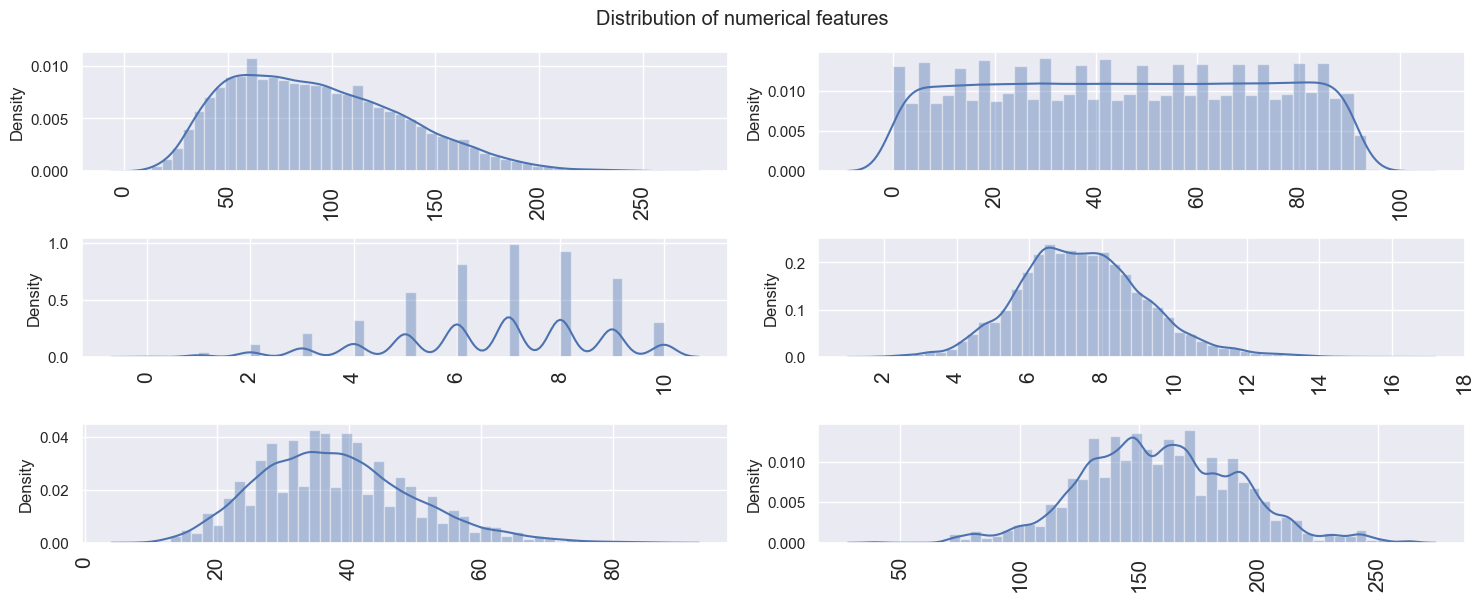

In [9]:
try:
    plt.suptitle("Distribution of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,2,i+1)
        sns.distplot(x=final_data[numerical_features[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

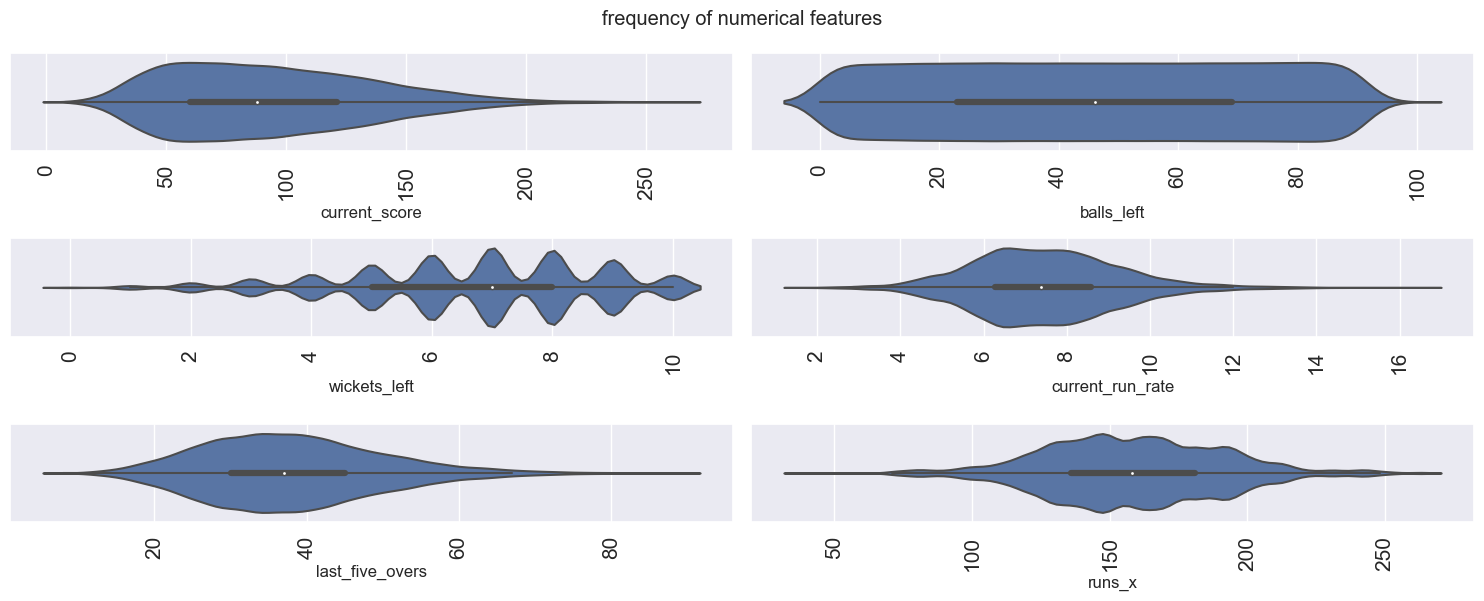

In [10]:
try:
    plt.suptitle("frequency of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,2,i+1)
        sns.violinplot(x=final_data[numerical_features[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

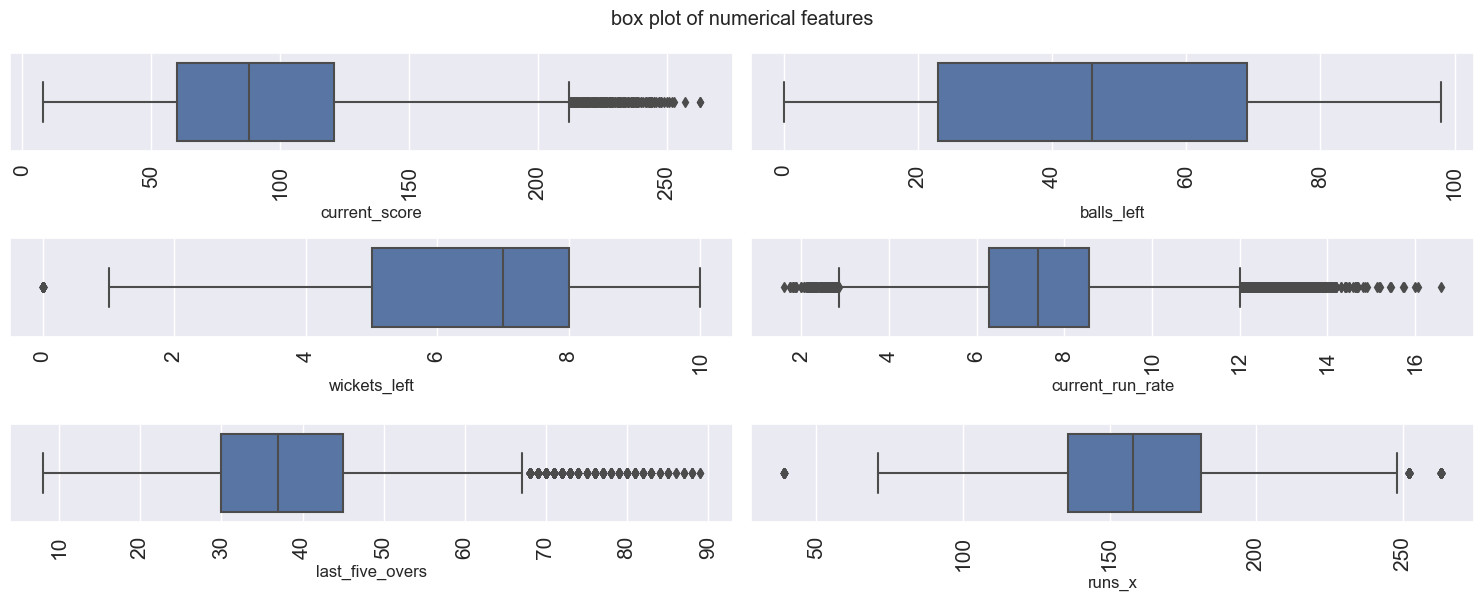

In [11]:
try:
    plt.suptitle("box plot of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,2,i+1)
        sns.boxplot(x=final_data[numerical_features[i]])
        plt.tight_layout()
        plt.xticks(size=15,rotation=90)
except Exception as e:
    print(e)

In [12]:
# get 5 number summary of data
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
current_score,54658.0,93.043470,41.478505,8.0,60.000000,88.000000,121.000000,263.0
balls_left,54658.0,45.878060,26.559190,0.0,23.000000,46.000000,69.000000,98.0
wickets_left,54658.0,6.713107,2.011194,0.0,5.000000,7.000000,8.000000,10.0
current_run_rate,54658.0,7.480734,1.764232,1.6,6.285714,7.391304,8.571429,16.6
last_five_overs,54658.0,38.055033,11.794663,8.0,30.000000,37.000000,45.000000,89.0
runs_x,54658.0,158.449449,32.477660,39.0,136.000000,158.000000,181.000000,263.0


<Axes: title={'center': 'Total Score by each team'}, xlabel='runs_x', ylabel='batting_team'>

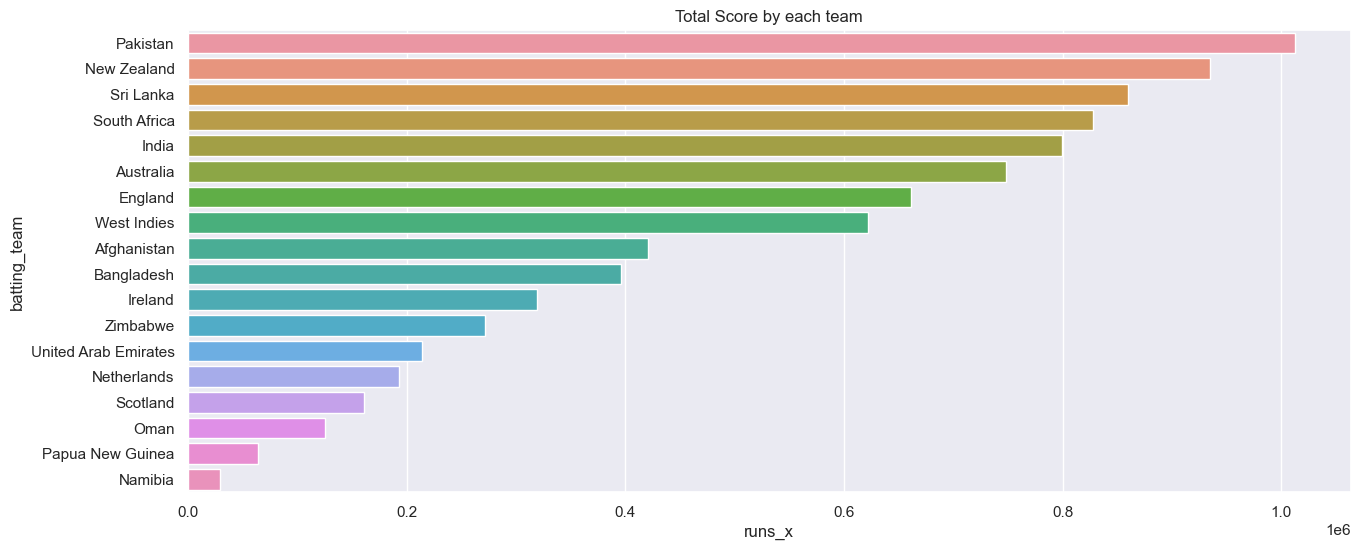

In [13]:
total_score_by_team = final_data.groupby("batting_team")["runs_x"].sum().sort_values(ascending=False).reset_index()
plt.title("Total Score by each team")
sns.barplot(x="runs_x",y="batting_team",data=total_score_by_team)

<Axes: title={'center': 'which city most runes scored '}, xlabel='runs_x', ylabel='citys'>

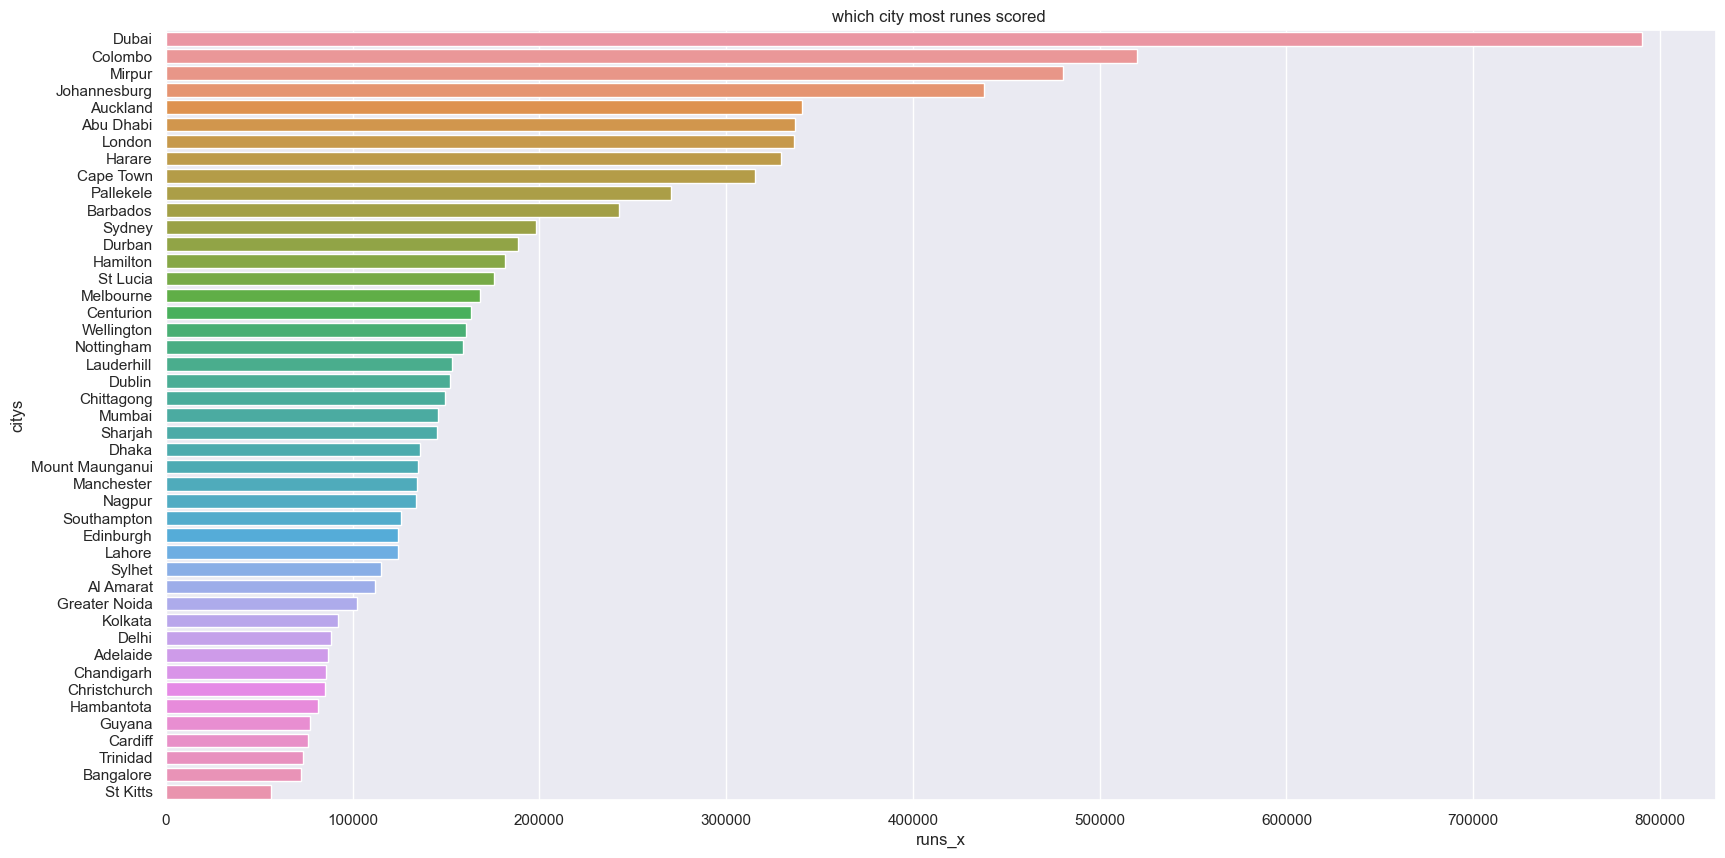

In [14]:
plt.figure(figsize=(20,10))
citys = final_data.groupby("citys")["runs_x"].sum().sort_values(ascending=False).reset_index()
plt.title("which city most runes scored ")
sns.barplot(x="runs_x",y="citys",data=citys)

<Axes: title={'center': 'team and there last 5 over score total'}, xlabel='last_five_overs', ylabel='batting_team'>

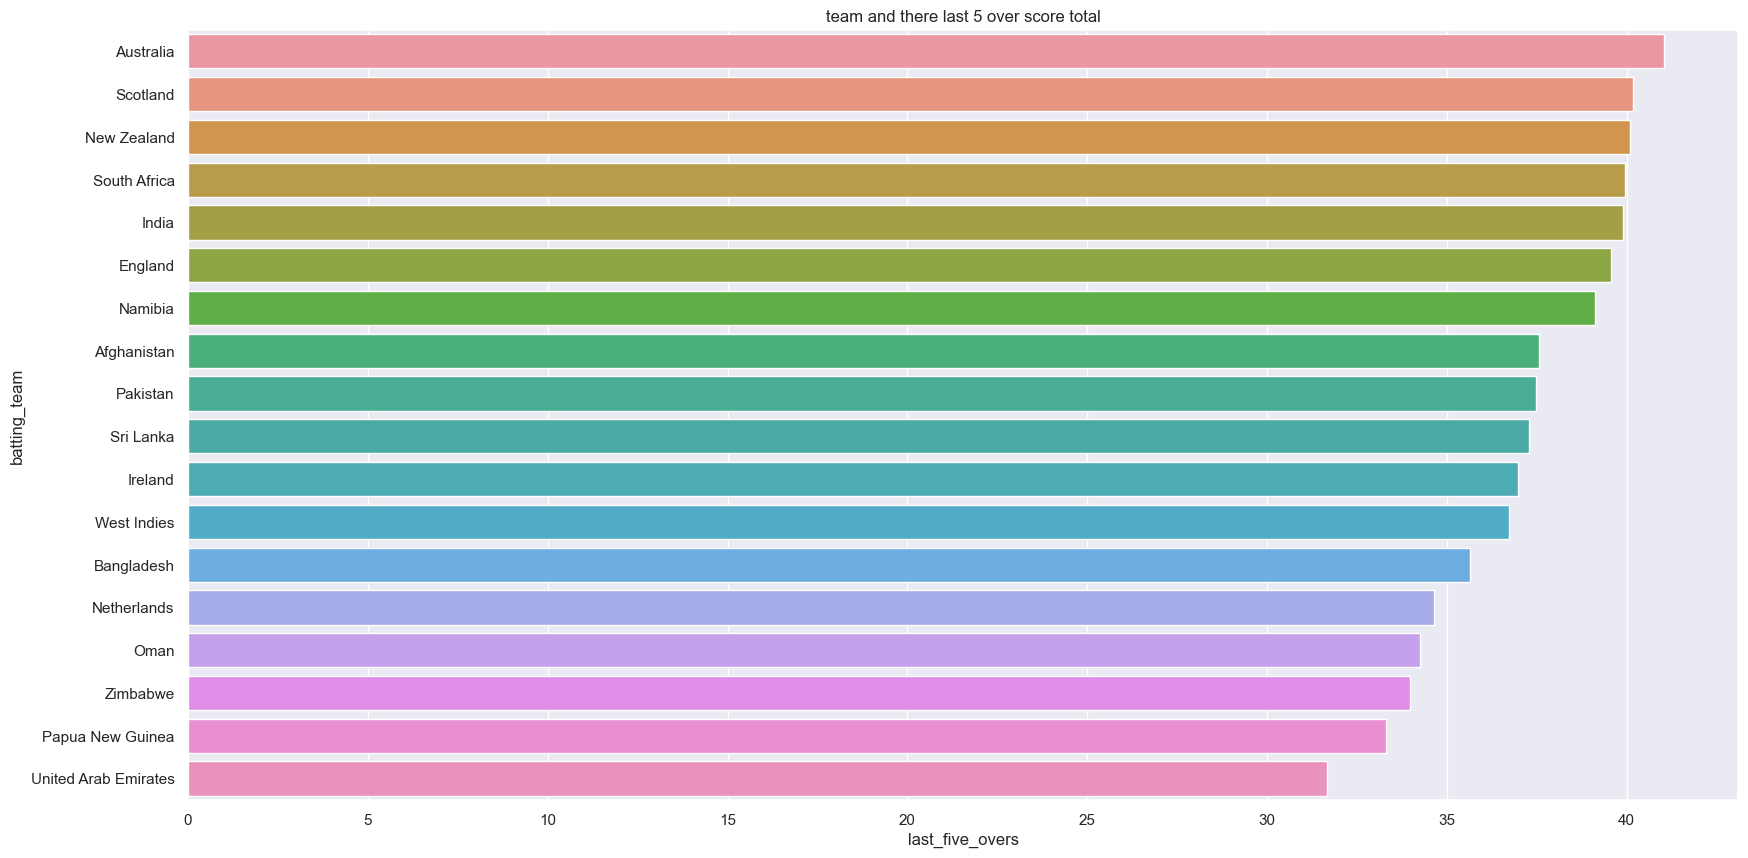

In [15]:
plt.figure(figsize=(20,10))
batting_team = final_data.groupby("batting_team")["last_five_overs"].mean().sort_values(ascending=False).reset_index()
plt.title("team and there last 5 over score total")
sns.barplot(x="last_five_overs",y="batting_team",data=batting_team)

## Model Buelding

In [16]:
final_data

,batting_team,bowling_team,citys,current_score,balls_left,wickets_left,current_run_rate,last_five_overs,runs_x
0,South Africa,Sri Lanka,Johannesburg,174,11,8,9.577982,63.0,198
1,Afghanistan,Netherlands,Edinburgh,32,87,8,5.818182,32.0,162
2,West Indies,Sri Lanka,Colombo,18,78,8,2.571429,17.0,137
3,West Indies,Ireland,Guyana,118,14,4,6.679245,36.0,138
4,Sri Lanka,Pakistan,London,65,54,6,5.909091,31.0,138
...,...,...,...,...,...,...,...,...,...
54653,Bangladesh,Pakistan,Pallekele,97,57,8,9.238095,36.0,175
54654,New Zealand,Sri Lanka,Wellington,105,54,8,9.545455,33.0,162
54655,Zimbabwe,New Zealand,Harare,52,65,7,5.672727,30.0,123
54656,England,Zimbabwe,Cape Town,89,64,7,9.535714,55.0,188


In [17]:
# saprate dependent and indipandent features
x  = final_data.drop("runs_x",axis=1)
y = final_data["runs_x"]

In [18]:
# saprate numerical and catigorical features
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['batting_team', 'bowling_team', 'citys'], dtype='object')
Index(['current_score', 'balls_left', 'wickets_left', 'current_run_rate',
       'last_five_overs'],
      dtype='object')


In [19]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
# Create numeric pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Create cotigorical pipline
cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("one_hot",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

## create preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43726, 8)
(10932, 8)
(43726,)
(10932,)


In [23]:
# apply preprocessor object and transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [37]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return f"MSE:{mse},MAE:{mae},RMSE:{rmse},R2Score:{r2score}"

In [46]:
nerest = KNeighborsRegressor(n_neighbors=10)
nerest.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [47]:
nerest.score(X_train,y_train)

0.9927632818033882

In [48]:
ypredict = nerest.predict(X_test)

In [49]:
model_evalution(ypredict,y_test)

'MSE:9.65739206000732,MAE:0.6874588364434686,RMSE:3.1076344797944495,R2Score:0.9909556040291834'

Text(0, 0.5, 'Predictions')

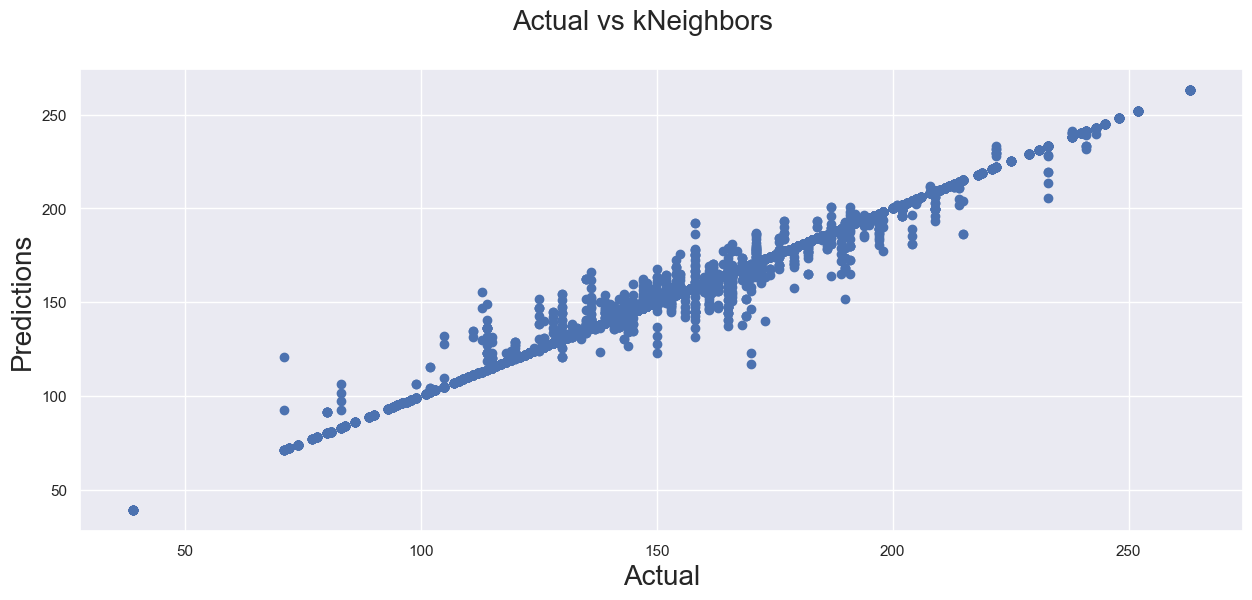

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,ypredict)
fig.suptitle('Actual vs kNeighbors', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [74]:
# gradientBoosting
gradient_boosting = GradientBoostingRegressor(
    n_estimators= 1000,
    max_depth=12,
    learning_rate=0.2,
    random_state=1  
)
gradient_boosting.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=12, n_estimators=1000,
                          random_state=1)

In [75]:
gradient_boosting.score(X_train,y_train)

0.9999604469958076

In [76]:
ypredict = gradient_boosting.predict(X_test)

In [77]:
model_evalution(ypredict,y_test)

'MSE:16.294149629193605,MAE:1.6923536754315922,RMSE:4.036601247236789,R2Score:0.9846334692409281'

Text(0, 0.5, 'Predictions')

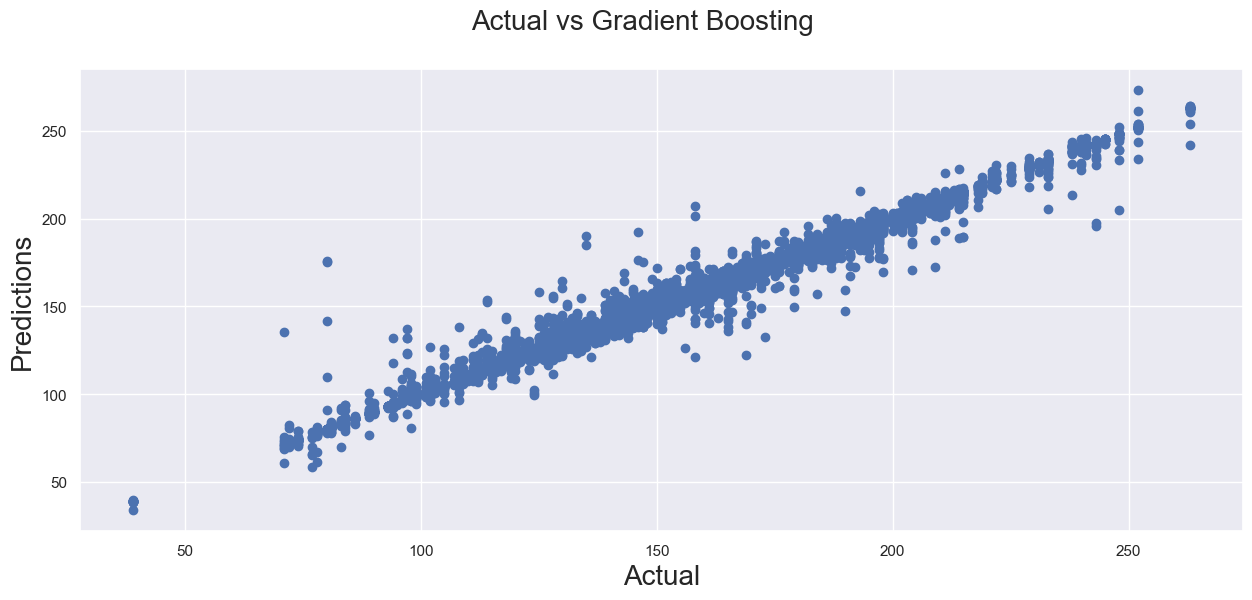

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,ypredict)
fig.suptitle('Actual vs Gradient Boosting', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)